### Ковальчук Алексей

- telegram: @analitiqq
- instagram: @analitiq
- web-site: http://analitiq.ru

Аэропорт: Strigino (Nizhny Novgorod)

Построить прогнозирование пассажиропотока по месяцам 2019 года, используя данные за предыдущие годы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
df = pd.read_csv("russian_passenger_air_service.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
Airport name           3961 non-null object
Year                   3961 non-null int64
January                3961 non-null float64
February               3961 non-null float64
March                  3961 non-null float64
April                  3961 non-null float64
May                    3961 non-null float64
June                   3961 non-null float64
July                   3961 non-null float64
August                 3961 non-null float64
September              3961 non-null float64
October                3961 non-null float64
November               3961 non-null float64
December               3961 non-null float64
Whole year             3961 non-null float64
Airport coordinates    3961 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 495.2+ KB


In [5]:
NNovgorod = df.groupby('Airport name').get_group('Nizhny Novgorod (Strigino)')
NNovgorod = NNovgorod[NNovgorod['Year']<2020]
NNovgorod.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
367,Nizhny Novgorod (Strigino),2019,61818.0,53821.0,67102.0,76634.0,101102.0,122324.0,129924.0,132268.0,124669.0,102303.0,73845.0,130.57,1114056.0,"(Decimal('43.791127'), Decimal('56.219628'))"
616,Nizhny Novgorod (Strigino),2018,64228.0,58094.0,69330.0,70733.0,97861.0,149100.0,136807.0,131040.0,123091.0,97462.0,70886.0,89.68,1134534.0,"(Decimal('43.791127'), Decimal('56.219628'))"
892,Nizhny Novgorod (Strigino),2017,48539.0,47505.0,54696.0,57602.0,79164.0,105225.0,116091.0,117271.0,114493.0,87225.0,67052.0,126.02,961491.0,"(Decimal('43.791127'), Decimal('56.219628'))"
1184,Nizhny Novgorod (Strigino),2016,43542.0,45828.0,51168.0,48643.0,61393.0,81623.0,88390.0,89151.0,86748.0,72332.0,54485.0,161.59,775679.0,"(Decimal('43.791127'), Decimal('56.219628'))"
1476,Nizhny Novgorod (Strigino),2015,51305.0,50359.0,54230.0,66345.0,83482.0,111717.0,122882.0,120001.0,102646.0,78804.0,53381.0,154.65,946334.0,"(Decimal('43.791127'), Decimal('56.219628'))"


In [9]:
print('Имеем всего данных по месяцам =', len(NNovgorod)*12)

Имеем всего данных по месяцам = 156


In [13]:
#Декабрь в базе приведен неверно: надо из всего года вычесть все остальные месяцы. Проделываем эту операцию.

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
NNovgorod['December'] = NNovgorod['Whole year']  - NNovgorod[months[:-1]].sum(axis = 1)
NNovgorod

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
367,Nizhny Novgorod (Strigino),2019,61818.0,53821.0,67102.0,76634.0,101102.0,122324.0,129924.0,132268.0,124669.0,102303.0,73845.0,68246.0,1114056.0,"(Decimal('43.791127'), Decimal('56.219628'))"
616,Nizhny Novgorod (Strigino),2018,64228.0,58094.0,69330.0,70733.0,97861.0,149100.0,136807.0,131040.0,123091.0,97462.0,70886.0,65902.0,1134534.0,"(Decimal('43.791127'), Decimal('56.219628'))"
892,Nizhny Novgorod (Strigino),2017,48539.0,47505.0,54696.0,57602.0,79164.0,105225.0,116091.0,117271.0,114493.0,87225.0,67052.0,66628.0,961491.0,"(Decimal('43.791127'), Decimal('56.219628'))"
1184,Nizhny Novgorod (Strigino),2016,43542.0,45828.0,51168.0,48643.0,61393.0,81623.0,88390.0,89151.0,86748.0,72332.0,54485.0,52376.0,775679.0,"(Decimal('43.791127'), Decimal('56.219628'))"
1476,Nizhny Novgorod (Strigino),2015,51305.0,50359.0,54230.0,66345.0,83482.0,111717.0,122882.0,120001.0,102646.0,78804.0,53381.0,51182.0,946334.0,"(Decimal('43.791127'), Decimal('56.219628'))"
1768,Nizhny Novgorod (Strigino),2014,62250.0,62924.0,75476.0,77980.0,110223.0,124834.0,129608.0,130684.0,122201.0,92436.0,72159.0,65980.0,1126755.0,"(Decimal('43.791127'), Decimal('56.219628'))"
2060,Nizhny Novgorod (Strigino),2013,51441.0,48021.0,59739.0,64638.0,75788.0,94255.0,99576.0,100116.0,96227.0,79446.0,72622.0,68146.0,910015.0,"(Decimal('43.791127'), Decimal('56.219628'))"
2352,Nizhny Novgorod (Strigino),2012,36637.0,36553.0,44060.0,46909.0,61165.0,78170.0,83396.0,85728.0,82397.0,63570.0,62175.0,60861.0,741621.0,"(Decimal('43.791127'), Decimal('56.219628'))"
2644,Nizhny Novgorod (Strigino),2011,18761.0,16387.0,17315.0,20641.0,35935.0,51489.0,57008.0,58506.0,55467.0,45093.0,42494.0,41204.0,460300.0,"(Decimal('43.791127'), Decimal('56.219628'))"
2936,Nizhny Novgorod (Strigino),2010,16135.0,18037.0,23527.0,24871.0,32646.0,43811.0,45592.0,43490.0,42531.0,34306.0,26051.0,21063.0,372060.0,"(Decimal('43.791127'), Decimal('56.219628'))"


In [22]:
N = np.array(NNovgorod[months])[::-1] # Переставляем года в порядке возрастания
N1 = N.flatten() # Вытягиваем двумерный массив в одномерный
NInThousand=K1/1000 #Будем рассматривать значение пассажиропотока в тысячах

In [23]:
Data = pd.DataFrame(NInThousand, columns = ['pas']) # Собираем новый датафрейм
Data

,pas
0,12.040
1,13.257
2,17.208
3,20.070
4,20.575
...,...
151,132.268
152,124.669
153,102.303
154,73.845


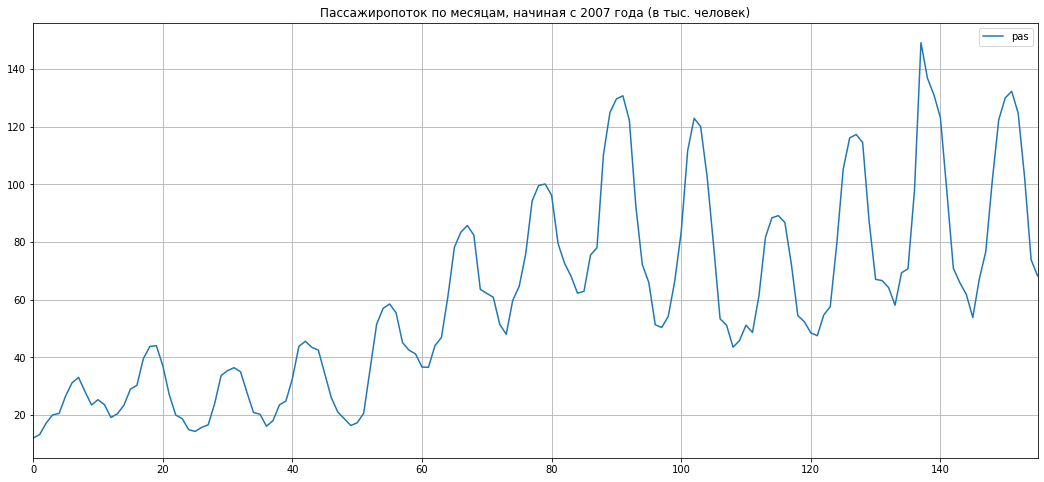

In [35]:
Data.plot(figsize=(18,8), title = 'Пассажиропоток по месяцам, начиная с 2007 года (в тыс. человек)'
          ,grid = True) # строим график
pass

### По рисунку видно, что график немного съезжает. Идея:  стационарности нет. Проверим это. 

Проведем тест Дики-Фулера
Нулевая гипотеза, что единичный корень - есть, то есть, что $\textbf{стационарность отсутствует}$.

В ответе - первой строчкой идёт значение статистики, а потом в фигурных скобках перечислены критические точки для трех уровней значимости. Критическое множество - слева.

In [36]:
test = sm.tsa.adfuller(Data['pas'])

# Напишем код для интерпритации результатов
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for key, value in test[4].items():
    print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.178943
p-value: 0.682588
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary


In [42]:
# Считаем разности между соседними 
Datadiff1 = Data.diff(periods=1).dropna()
Datadiff1

,pas
1,1.217
2,3.951
3,2.862
4,0.505
5,6.013
...,...
151,2.344
152,-7.599
153,-22.366
154,-28.458


In [44]:
# Повторно используем критерий Дики - Фулера
test1 = sm.tsa.adfuller(Datadiff1['pas'])

# Напишем код для интерпритации результатов
print('ADF Statistic: %f' % test1[0])
print('p-value: %f' % test1[1])
print('Critical Values:')
for key, value in test1[4].items():
    print('\t%s: %.3f' % (key, value))

if test1[0] < test1[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -3.023256
p-value: 0.032779
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject Ho - Time Series is Stationary


Отлично! Видим, что на уровне значимости 5% можно считать, что ряд стационарен. Нарисуем график.

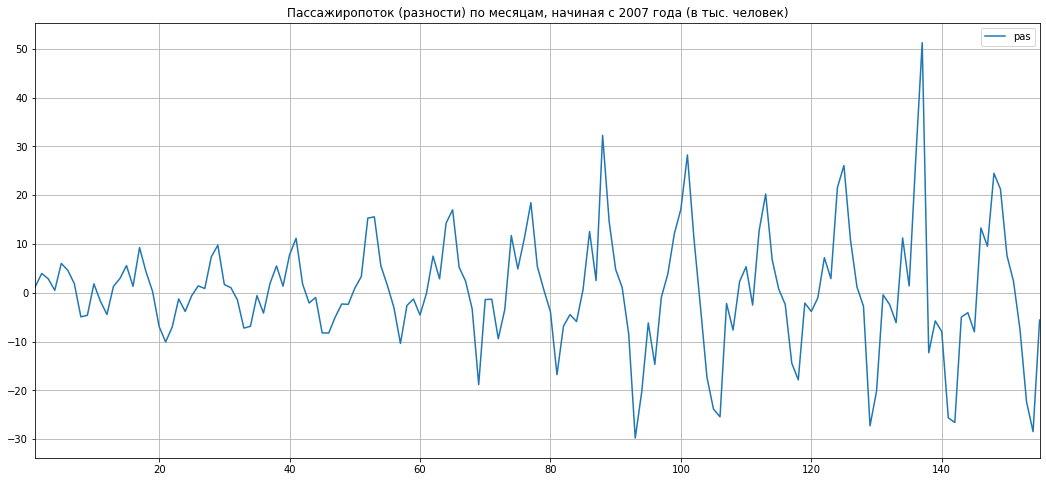

In [46]:
Datadiff1.plot(figsize=(18,8), title = 'Пассажиропоток (разности) по месяцам, начиная с 2007 года (в тыс. человек)'
          ,grid = True) # строим график
pass

Видим по графику сильную сезонность.

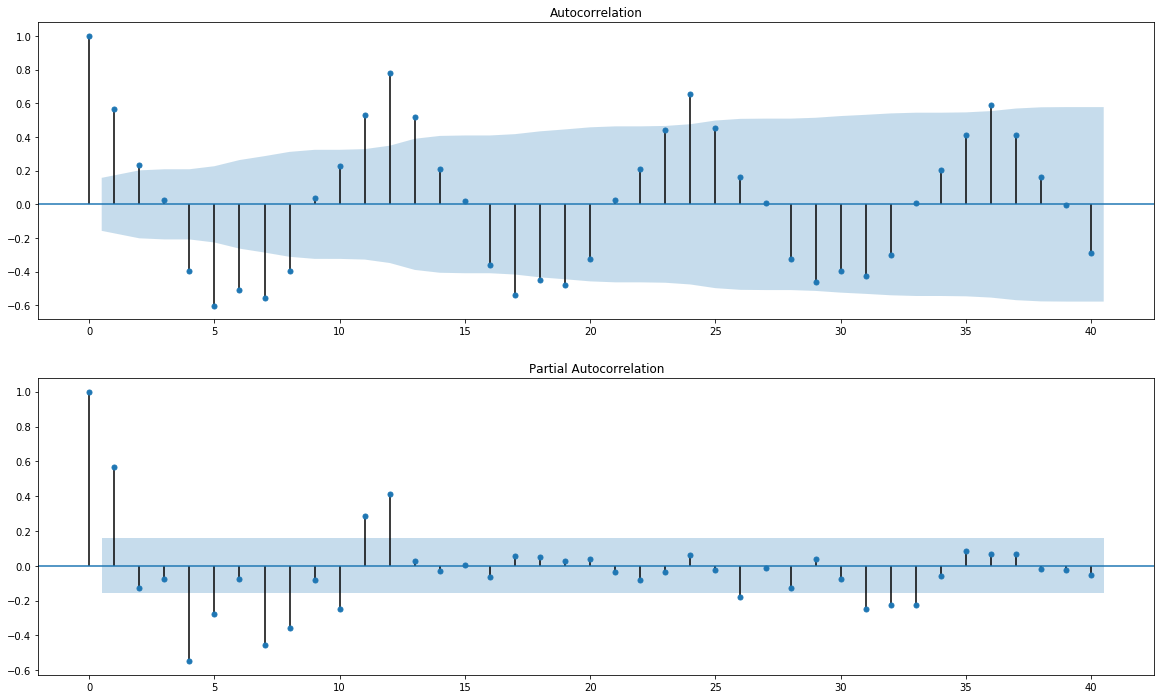

In [48]:
# Строим автокорреляцию
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Datadiff1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Datadiff1, lags=40, ax=ax2)

Из вышепреведённых графиков трудно сделать какой-то чёткий вывод.

In [115]:
# Попытаемся подобрать модель. Будем использовать "Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model"

M = sm.tsa.statespace.SARIMAX(Data[:144], order=[1, 1, 3], seasonal_order=[4, 1, 4, 6], trend=None).fit()
print(M.summary())

                                 Statespace Model Results                                
Dep. Variable:                               pas   No. Observations:                  144
Model:             SARIMAX(1, 1, 3)x(4, 1, 4, 6)   Log Likelihood                -439.272
Date:                           Wed, 27 May 2020   AIC                            904.544
Time:                                   19:15:32   BIC                            942.504
Sample:                                        0   HQIC                           919.970
                                           - 144                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9194      0.164      5.620      0.000       0.599       1.240
ma.L1         -0.8566      0.450     -1.903

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Для более точного предсказания сделаем следующую манипуляцию.

В модели авторегрессии мы можем найти ошибки: M.forecasts_error[0] (массив)

Идея будет состоять в следующем: мы сделаем достаточно хаотичный перебор (поставим условные границы на параметры модели) и будем отдавать предпочтение тем параметрам, при которых сумма модулей ошибок будет наименьшей. Напишем перебор(сначала по параметрам order):

In [94]:
for i in range(4):
    for j in range(4):
        for k in range(4):      
            M = sm.tsa.statespace.SARIMAX(Data[:144], order=[i, j, k], seasonal_order=[4, 1, 1, 11], trend=None).fit()
            rez = 0 #Переменная для текущей суммы ощибок
            for count in range(len(M.forecasts_error[0])):
                rez += abs(M.forecasts_error[0][count])
            print('i,j,k,rez =',i,j,k,rez)

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 0 0 0 2013.150311609228
i,j,k,rez = 0 0 1 1473.4351395507178
i,j,k,rez = 0 0 2 1302.8821327378719
i,j,k,rez = 0 0 3 1223.269010080686
i,j,k,rez = 0 1 0 948.1620420992634
i,j,k,rez = 0 1 1 918.6375281427013
i,j,k,rez = 0 1 2 937.876190130607
i,j,k,rez = 0 1 3 908.2800460704241
i,j,k,rez = 0 2 0 1099.618380018135


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 0 2 1 964.2931752763171


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 0 2 2 936.3026278077795
i,j,k,rez = 0 2 3 953.0809019458835
i,j,k,rez = 0 3 0 1501.6705780442473


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 0 3 1 1148.6626144435916


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 0 3 2 1001.5927102152393
i,j,k,rez = 0 3 3 972.5897906516566
i,j,k,rez = 1 0 0 1177.1355078837128
i,j,k,rez = 1 0 1 1159.275876753518
i,j,k,rez = 1 0 2 1160.712745345586
i,j,k,rez = 1 0 3 1131.079332589359
i,j,k,rez = 1 1 0 913.8865436700873
i,j,k,rez = 1 1 1 929.7514222330138
i,j,k,rez = 1 1 2 933.0915352235764
i,j,k,rez = 1 1 3 907.6191688291904
i,j,k,rez = 1 2 0 1052.4625218883318


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 1 2 1 929.5422329083284


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 1 2 2 947.1123266497073
i,j,k,rez = 1 2 3 935.1005491209999
i,j,k,rez = 1 3 0 1327.7033889648092


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 1 3 1 1097.1054578300354


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 1 3 2 1055.9825349312357


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 1 3 3 1001.4151385919735
i,j,k,rez = 2 0 0 1148.1776856777744
i,j,k,rez = 2 0 1 1163.4405455894184
i,j,k,rez = 2 0 2 1161.7850964314694
i,j,k,rez = 2 0 3 1124.0592959223611
i,j,k,rez = 2 1 0 929.8283950365744
i,j,k,rez = 2 1 1 935.221863844111


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 1 2 867.2383221380385


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 1 3 844.0789710327938
i,j,k,rez = 2 2 0 1022.6324063519144
i,j,k,rez = 2 2 1 1019.0774288404372


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 2 2 913.7709259318057


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 2 3 918.1022550857846
i,j,k,rez = 2 3 0 1223.711666643187


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 3 1 1058.71216182546


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 3 2 1057.8216793464599


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 2 3 3 955.1117145693518
i,j,k,rez = 3 0 0 1145.6697112748614
i,j,k,rez = 3 0 1 1153.9504748389352


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 0 2 1071.7981328703704


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 0 3 1107.8653443931378
i,j,k,rez = 3 1 0 929.0873198448963
i,j,k,rez = 3 1 1 931.6394430735843


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 1 2 819.9173976282991


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 1 3 852.4712461207039
i,j,k,rez = 3 2 0 1018.3859816127637
i,j,k,rez = 3 2 1 1017.4223095327811


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 2 2 945.6798728144805


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 2 3 886.2745248254473
i,j,k,rez = 3 3 0 1211.5215782013208


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 3 1 1057.2733083067462


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 3 2 1057.2612094010215


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i,j,k,rez = 3 3 3 948.6703438926804


In [105]:
for c in range(12): 
    for d in range(12): 
        M = sm.tsa.statespace.SARIMAX(Data[:144], order=[1, 1, 3], seasonal_order=[0, 0, c, d], trend=None).fit()
        rez = 0 #Переменная для текущей суммы ощибок
        for count in range(len(M.forecasts_error[0])):
            rez += abs(M.forecasts_error[0][count])
        print('c,d,rez =',c,d,rez)

c,d,rez = 0 0 913.5468131342743
c,d,rez = 0 1 913.5468131342743
c,d,rez = 0 2 913.5468131342743
c,d,rez = 0 3 913.5468131342743
c,d,rez = 0 4 913.5468131342743
c,d,rez = 0 5 913.5468131342743
c,d,rez = 0 6 913.5468131342743
c,d,rez = 0 7 913.5468131342743
c,d,rez = 0 8 913.5468131342743
c,d,rez = 0 9 913.5468131342743
c,d,rez = 0 10 913.5468131342743
c,d,rez = 0 11 913.5468131342743
c,d,rez = 1 0 822.5418886500653
c,d,rez = 1 1 822.5418886500653
c,d,rez = 1 2 833.028810754282
c,d,rez = 1 3 854.5290866622302
c,d,rez = 1 4 870.2672230112148
c,d,rez = 1 5 805.4669010240847
c,d,rez = 1 6 914.5347637477605
c,d,rez = 1 7 849.9712646508513
c,d,rez = 1 8 848.7535826206336
c,d,rez = 1 9 894.9959954914647
c,d,rez = 1 10 935.8407691942635
c,d,rez = 1 11 911.8794701161637


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 2 0 766.9546078749989


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 2 1 766.9546078749989
c,d,rez = 2 2 843.9621460645004
c,d,rez = 2 3 862.9686078726503
c,d,rez = 2 4 854.4513062485212
c,d,rez = 2 5 802.7456729079505
c,d,rez = 2 6 741.1166161168844
c,d,rez = 2 7 841.2130827526488
c,d,rez = 2 8 810.0697524183156
c,d,rez = 2 9 894.1919676098921
c,d,rez = 2 10 848.4621876524453
c,d,rez = 2 11 908.5079596284243


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 3 0 765.6624329242918


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 3 1 765.6624329242918
c,d,rez = 3 2 847.2837918698241
c,d,rez = 3 3 881.6919760963518
c,d,rez = 3 4 743.9789026975155
c,d,rez = 3 5 809.4229632986187
c,d,rez = 3 6 739.9326395383034
c,d,rez = 3 7 834.972382083303
c,d,rez = 3 8 761.4750409066238
c,d,rez = 3 9 913.6646613230172
c,d,rez = 3 10 850.6108121869527
c,d,rez = 3 11 899.7853752672496


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 4 0 767.0810526905765


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 4 1 767.0810526905765
c,d,rez = 4 2 818.1407665764841
c,d,rez = 4 3 716.5035248607526
c,d,rez = 4 4 734.5347623265031
c,d,rez = 4 5 810.690218048718
c,d,rez = 4 6 675.418822498999


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 4 7 776.2569644100132


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 4 8 736.2224620304734
c,d,rez = 4 9 765.0284336445901
c,d,rez = 4 10 858.3002086489724
c,d,rez = 4 11 876.9677228124395
c,d,rez = 5 0 771.5948138766188
c,d,rez = 5 1 771.5948138766188


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 5 2 852.3768662798465
c,d,rez = 5 3 687.4082285862495
c,d,rez = 5 4 709.7218558497663
c,d,rez = 5 5 735.3490915960754


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 5 6 904.752750260636


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c,d,rez = 5 7 737.0366781199067
c,d,rez = 5 8 730.7841566762347
c,d,rez = 5 9 775.4930542964803


ValueError: maxlag should be < nobs

### Строим прогноз

In [116]:
print(M.forecast(12))

144     61.199150
145     58.512814
146     67.725268
147     68.803346
148     92.462716
149    130.024460
150    129.343365
151    126.957185
152    121.316163
153     96.437218
154     73.820296
155     72.427858
dtype: float64


In [117]:
print(Data[144:])

         pas
144   61.818
145   53.821
146   67.102
147   76.634
148  101.102
149  122.324
150  129.924
151  132.268
152  124.669
153  102.303
154   73.845
155   68.246


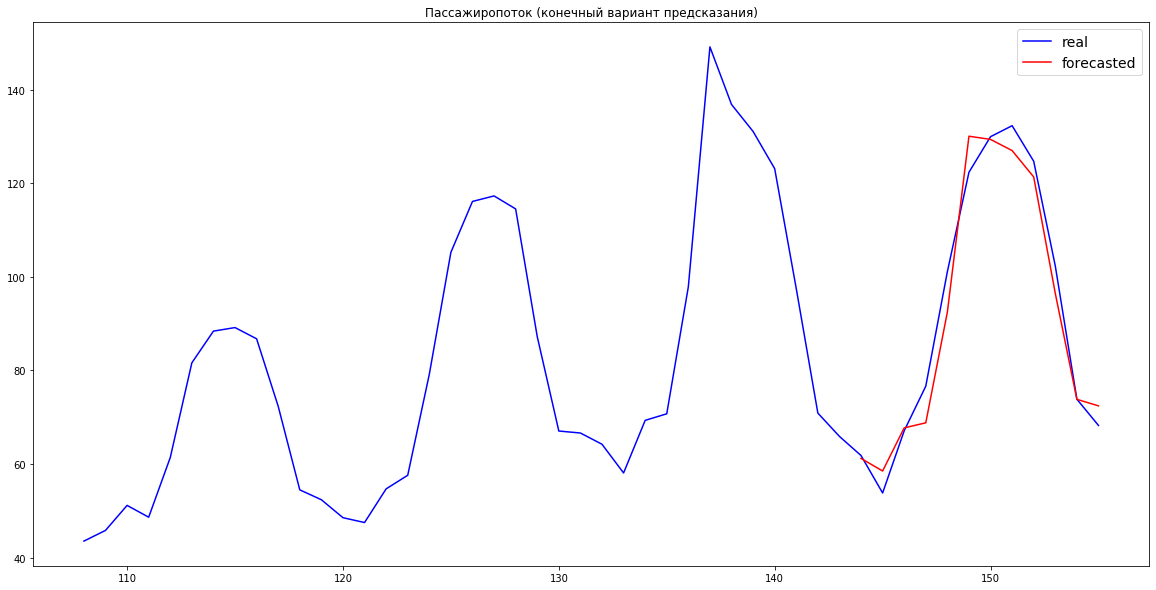

In [121]:
plt.figure(figsize=(20,10))
plt.title('Пассажиропоток (конечный вариант предсказания)')
plt.plot(Data[108:]['pas'],color='blue',label='real')
plt.plot( M.forecast(12), color='red',label='forecasted' )
plt.legend(loc='best', fontsize = 14)
plt.show()

Выглядит неплохо, получаем, что перебор параметров был сделан незря. Ниже приложу изначальный график на параметрах, указанных в примере:

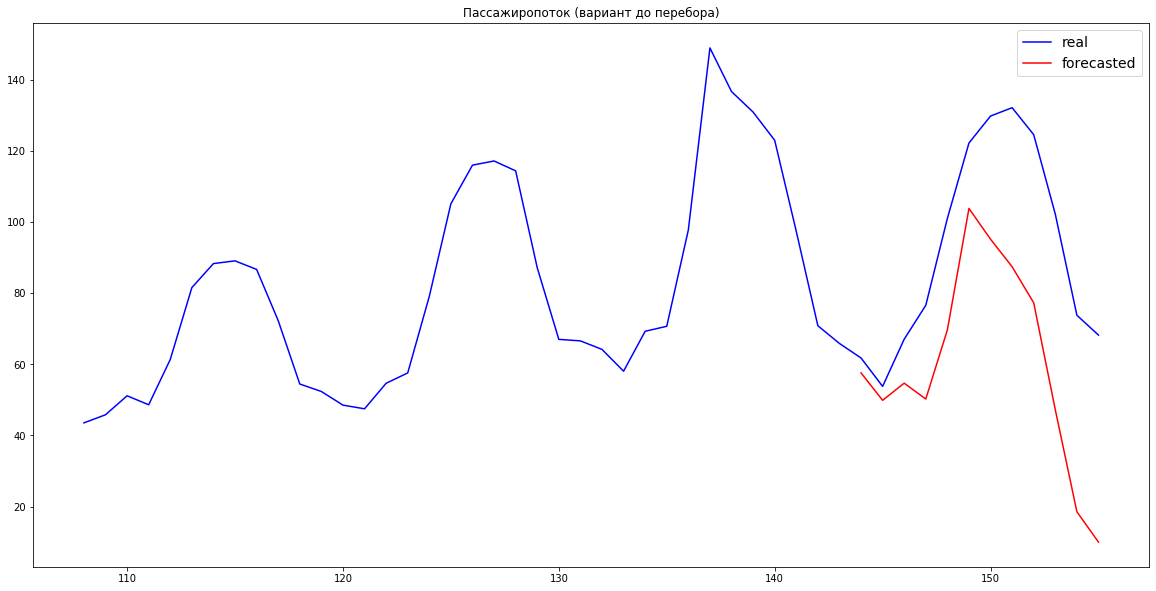

In [124]:
M = sm.tsa.statespace.SARIMAX(Data[:144], order=[1, 2, 0], seasonal_order=[4, 1, 1, 12], trend=None).fit()
plt.figure(figsize=(20,10))
plt.title('Пассажиропоток (вариант до перебора)')
plt.plot(Data[108:]['pas'],color='blue',label='real')
plt.plot( M.forecast(12), color='red',label='forecasted' )
plt.legend(loc='best', fontsize = 14)
plt.show()